## Проект e-commerce

### 1. Предварительный анализ данных.

In [1]:
import pandas as pd

from datetime import timedelta

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette('Set2')

In [2]:
# Загружаем данные по пользователям
customer_data = pd.read_csv('data/olist_customers_dataset.zip')

In [3]:
customer_data.head()


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
# Посмотрим на типы данных и пропуски
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [5]:
# Проверяем на дубликаты
customer_data.duplicated().sum()

0

In [6]:
# Описательные статистики
customer_data.describe(include='object')

,customer_id,customer_unique_id,customer_city,customer_state
count,99441,99441,99441,99441
unique,99441,96096,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,sao paulo,SP
freq,1,17,15540,41746


В данных 99441 строка, пропусков нет, 4 столбца - тип object, 1 - тип int64. Полных дубликатов в датасете нет.

Доставка осуществляется в 4119 городов в 27 штатах Бразилии. Наиболее популярное мето доставки - Sao Paulo (Сан-Пауло) - 15540 записей, наиболее популярный штат доставки -  SP - 41746 записей.

In [7]:
# Загружаем данные по заказам
orders_data = pd.read_csv('data/olist_orders_dataset.zip')

In [8]:
orders_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [9]:
# Типы данных и пропуски
orders_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [10]:
# Количество пропусков
orders_data.isna().sum()


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [11]:
# Проверяем на дубликаты
orders_data.duplicated().sum()

0

In [12]:
# Описательные статистики
orders_data.describe(include='object')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


В данных 99441 строка, пропуски: order_delivered_carrier_date - 160, order_delivered_carrier_date - 1783, order_delivered_customer_date - 2965. То есть: из 99441 заказа 2965 не были доставлены, из них 1783 не были переданы в логистическую службу, из них по 160 не была подтверждена оплата. 

Все столбцы имеют тип object, столбцы со временем необходимо перевести в формат DateTime


In [13]:
# Загружаем данные по товарным позициям
items_data = pd.read_csv('data/olist_order_items_dataset.zip')

In [14]:
items_data.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [15]:
# Типы данных и пропуски
items_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [16]:
# Описательные статистики числовых признаков
items_data.describe().round(2)

,order_item_id,price,freight_value
count,112650.00,112650.00,112650.00
mean,1.20,120.65,19.99
std,0.71,183.63,15.81
min,1.00,0.85,0.00
25%,1.00,39.90,13.08
50%,1.00,74.99,16.26
75%,1.00,134.90,21.15
max,21.00,6735.00,409.68


In [17]:
# Описательные статистики категориальных признаков
items_data.describe(include='object')

,order_id,product_id,seller_id,shipping_limit_date
count,112650,112650,112650,112650
unique,98666,32951,3095,93318
top,8272b63d03f5f79c56e9e4120aec44ef,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23
freq,21,527,2033,21


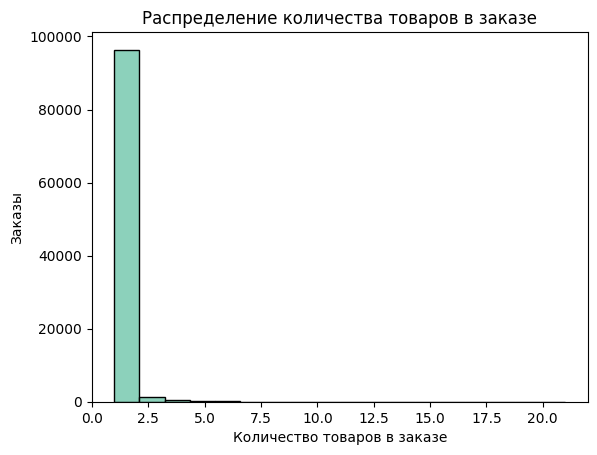

In [18]:
num_items = items_data.groupby('order_id')['order_item_id'].count()
sns.histplot(num_items)
plt.title('Распределение количества товаров в заказе')
plt.xlabel('Количество товаров в заказе')
plt.ylabel('Заказы')
plt.show()

В датасете 112650 строк, пропусков нет. Данные представлены типами object, int64 и float64. Возможно потребуется перевести shipping_limit_date в Datetime (если понадобится в ходе исследования)

Числовые признаки: price, freight_value: стоимость товаров варьируется от 0.85 до 6735, среднее 120.65, медианная стоимость 74.99.
Вес товара от 0 (возможно вес совсем мелких товаров в базе не учитывается) до 409.68

Наибольшее число заказов состояло из одного товара.

### 2. Определение понятия "покупка"

Для ответа на поставленные вопросы необходимо определиться с термином "покупка" в контексте имеющихся данных. Для этого проведем дополнительные исследования. 

Все ли зарегистрированные пользователи сделали хотя бы один заказ? Для этого сравним столбцы customer_id из двух датасетов.

In [19]:
customer_data['customer_id'].isin(orders_data['customer_id']).value_counts()

customer_id
True    99441
Name: count, dtype: int64

Количество совпадений 99441, что соответствует полному набору данных. Следовательно, все зарегистрированные пользователи сделали хотя бы один заказ.

In [20]:
# Переведем в корректный формат даты из таблицы orders_data
column_to_change = ['order_purchase_timestamp', 'order_approved_at', 
                    'order_delivered_carrier_date', 'order_delivered_customer_date']
for col in column_to_change:
    orders_data[col] = pd.to_datetime(orders_data[col])

In [21]:
# Проверка
orders_data[column_to_change].dtypes

order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
dtype: object

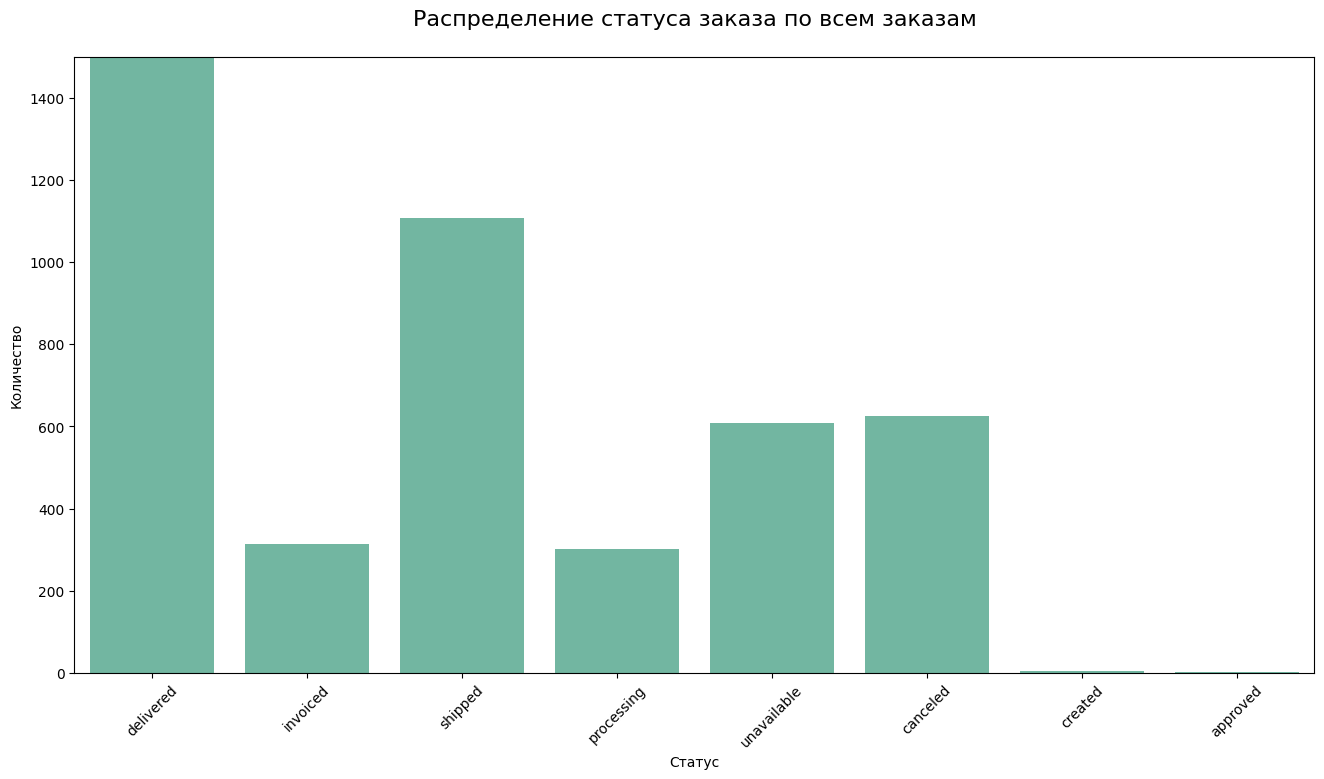

In [22]:

# Посмотрим на распределение статуса заказа среди всех заказов
plt.figure(figsize=(16, 8))
sns.countplot(x=orders_data.order_status)
plt.ylim(0, 1500) # для наглядности ограничим вывод по оси y
plt.xticks(rotation=45)
plt.title('Распределение статуса заказа по всем заказам\n', fontsize=16)
plt.xlabel('Статус')
plt.ylabel('Количество')
plt.show()

**В итоге**: покупкой буду считать только товары со статусами delivered, shipped, processing. Есть, конечно, вероятность, что товар в статусе shipped и processing не будет доставлен, но это будет небольшая погрешность, по сравнению с потерей этих сегментов, если бы мы ограничились только статусом delivered.

### 3. Ответы на поставленные вопросы.

#### 3.1. Сколько пользователей, которые совершили покупку только один раз?

In [23]:
# Объединим таблицу клиентов и таблицу заказов
merge_customer = customer_data.merge(orders_data, how='left', on='customer_id')

In [24]:
# Отфильтруем данные по факту покупки
customers = merge_customer \
    .query('order_status in ["delivered", "shipped", "processing"]')\
    .groupby('customer_unique_id', as_index=False)['customer_id'] \
    .count() \
    .query('customer_id == 1') \
    .customer_id.count()
print(f'Пользователей, совершивших покупку только один раз: {customers}')

Пользователей, совершивших покупку только один раз: 91814


#### 3.2. Сколько заказов в месяц в среднем не доставляется по разным причинам?

Поскольку в поставленном вопросе нет уточнения, должны ли мы исследовать только заказы, являющиеся покупками или вообще все заказы, возьмем для рассмотрения именно все заказы.

In [25]:
# Посмотрим на заказы со статусом delivered
merge_customer.query('order_status != "delivered"').shape

(2963, 12)

In [26]:
# и сравним с заказами, в которых не проставлена дата доставки
merge_customer.order_delivered_customer_date.isna().sum()

2965

Размеры выборок отличаются, хотя, казалось бы, должны совпадать. Рассмотрим подробнее:

In [27]:
# Выведем разбивку по статусам для данных с отсутствующей информацией по дате доставки
merge_customer[pd.isnull(merge_customer['order_delivered_customer_date'])].order_status.value_counts()


order_status
shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered         8
created           5
approved          2
Name: count, dtype: int64

В данных есть 8 заказов со статусом delivered, посмотрим на них:

In [28]:
merge_customer[pd.isnull(merge_customer['order_delivered_customer_date'])].query('order_status == "delivered"')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
9034,5e89028e024b381dc84a13a3570decb4,2f17c5b324ad603491521b279a9ff4de,18255,quadra,SP,f5dd62b788049ad9fc0526e3ad11a097,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaT,2018-07-16 00:00:00
12030,28c37425f1127d887d7337f284080a0f,175378436e2978be55b8f4316bce4811,9431,ribeirao pires,SP,20edc82cf5400ce95e1afacc25798b31,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaT,2018-07-19 00:00:00
13357,29f0540231702fda0cfdee0a310f11aa,1bd06a0c0df8b23dacfd3725d2dc0bb9,12445,pindamonhangaba,SP,2ebdfc4f15f23b91474edf87475f108e,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaT,2018-07-30 00:00:00
51668,ec05a6d8558c6455f0cbbd8a420ad34f,13467e882eb3a701826435ee4424f2bd,18520,cerquilho,SP,2d1e2d5bf4dc7227b3bfebb81328c15f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaT,2017-12-18 00:00:00
85377,dd1b84a7286eb4524d52af4256c0ba24,cce5e8188bf42ffb3bb5b18ff58f5965,7261,guarulhos,SP,ab7c89dc1bf4a1ead9d6ec1ec8968a84,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaT,2018-06-26 00:00:00
87172,cfda40ca8dd0a5d486a9635b611b398a,3bc508d482a402715be4d5cf4020cc81,13170,sumare,SP,e69f75a717d64fc5ecdfae42b2e8e086,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaT,2018-07-30 00:00:00
89194,4f1d63d35fb7c8999853b2699f5c7649,ebf7e0d43a78c81991a4c59c145c75db,13560,sao carlos,SP,0d3268bad9b086af767785e3f0fc0133,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaT,2018-07-24 00:00:00
97677,e08caf668d499a6d643dafd7c5cc498a,d77cf4be2654aa70ef150f8bfec076a6,91330,porto alegre,RS,2d858f451373b04fb5c984a1cc2defaf,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaT,NaT,2017-06-23 00:00:00


Для всех заказов, кроме одного, указана дата передачи товара в логистическую службу, но нет даты доставки. Это может означать, что по какой-то причине дата не была проставлена или, например, отмену заказа, но статус по какой-то причине не изменили. К сожалению, у нас нет данных для понимания точной причины, поэтому исключим эти записи из анализа недоставленных заказов.

In [29]:
# Разбивка по статусам для всех заказов
merge_customer.order_status.value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

Мы видим, что здесь отмененных заказов на 6 больше, чем в разбивке по статусам для заказов с отсутствующей датой доставки. Посмотрим на эти записи:

In [30]:
merge_customer[(merge_customer.order_status == 'canceled') & ~pd.isnull(merge_customer['order_delivered_customer_date'])]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
27088,6c57e6119369185e575b36712766b0ef,59a7bb642795ddc85534fbd5f7360334,20091,rio de janeiro,RJ,770d331c84e5b214bd9dc70a10b829d0,canceled,2016-10-07 14:52:30,2016-10-07 15:07:10,2016-10-11 15:07:11,2016-10-14 15:07:11,2016-11-29 00:00:00
50569,1bccb206de9f0f25adc6871a1bcf77b2,6a04c8339c44b23e189446216a494569,32071,contagem,MG,1950d777989f6a877539f53795b4c3c3,canceled,2018-02-19 19:48:52,2018-02-19 20:56:05,2018-02-20 19:57:13,2018-03-21 22:03:51,2018-03-09 00:00:00
57499,bf609b5741f71697f65ce3852c5d2623,f9af3bfab584769f34c314b222d34263,20091,rio de janeiro,RJ,8beb59392e21af5eb9547ae1a9938d06,canceled,2016-10-08 20:17:50,2016-10-09 14:34:30,2016-10-14 22:45:26,2016-10-19 18:47:43,2016-11-30 00:00:00
59705,70fc57eeae292675927697fe03ad3ff5,b8b8726af116a5cfb35b0315ecef9172,22770,rio de janeiro,RJ,65d1e226dfaeb8cdc42f665422522d14,canceled,2016-10-03 21:01:41,2016-10-04 10:18:57,2016-10-25 12:14:28,2016-11-08 10:58:34,2016-11-25 00:00:00
76291,de4caa97afa80c8eeac2ff4c8da5b72e,d93a22bb52bb2f41a7267b8a02370781,88058,florianopolis,SC,2c45c33d2f9cb8ff8b1c86cc28c11c30,canceled,2016-10-09 15:39:56,2016-10-10 10:40:49,2016-10-14 10:40:50,2016-11-09 14:53:50,2016-12-08 00:00:00
77039,5cdec0bb8cbdf53ffc8fdc212cd247c6,2f96790fba243100730c8d1185dd2f25,5846,sao paulo,SP,dabf2b0e35b423f94618bf965fcb7514,canceled,2016-10-09 00:56:52,2016-10-09 13:36:58,2016-10-13 13:36:59,2016-10-16 14:36:59,2016-11-30 00:00:00


Мы видим, что дата доставки у всех записей присутствует, следовательно, необходимо включить эти записи в анализ.

In [31]:
# Сохраним в переменную индексы для удаления
index_to_del = merge_customer[pd.isnull(merge_customer['order_delivered_customer_date'])] \
    .query('order_status == "delivered"').index
index_to_del

Index([9034, 12030, 13357, 51668, 85377, 87172, 89194, 97677], dtype='int64')

In [32]:
# Сохраним в переменную индексы для добавления
index_to_concat = merge_customer[(merge_customer.order_status == 'canceled') &  \
    ~pd.isnull(merge_customer['order_delivered_customer_date'])].index
index_to_concat

Index([27088, 50569, 57499, 59705, 76291, 77039], dtype='int64')

In [33]:
# Фильтруем записи для подсчета недоставленных заказов
non_delivery_data = pd.concat([merge_customer[pd.isnull(merge_customer['order_delivered_customer_date'])] \
    .drop(index=index_to_del), merge_customer.iloc[index_to_concat]]).sort_index()

In [34]:
non_delivery_data.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
46,f34a6e874087ec1f0e3dab9fdf659c5d,233896de79986082f1f479f1f85281cb,38300,ituiutaba,MG,6e98de3a85c84ead6689189b825d35b5,canceled,2018-03-15 10:07:02,2018-03-15 10:29:33,NaT,NaT,2018-04-09 00:00:00
47,c132855c926907970dcf6f2bf0b33a24,a8ae36a2bb6c2bbc3b5d62ede131c9ef,18740,taquarituba,SP,b5172d4a722c0ebb34c29bbbb7a3cb42,invoiced,2018-04-17 13:14:13,2018-04-18 05:31:51,NaT,NaT,2018-05-24 00:00:00
70,4c7241af24b5344cb01fe687643de4fe,b157c176c3fe04914fde33f2dc8b878a,60336,fortaleza,CE,ad380680e87dea0f2abf5cd5bace626c,shipped,2018-01-21 15:54:02,2018-01-22 13:52:41,2018-01-24 18:26:40,NaT,2018-02-20 00:00:00


Будем считать даты недоставленных заказов по датам создания заказов, а сам подсчет осуществим по статусу заказа.

In [35]:
# Создадим столбцы с месяцем и годом создания заказа для последующей группировки
non_delivery_data['year'] = non_delivery_data['order_purchase_timestamp'].dt.year
non_delivery_data['month'] = non_delivery_data['order_purchase_timestamp'].dt.month

In [36]:
# Группируем данные
non_delivery_data_grouped = non_delivery_data.groupby(['year', 'month', 'order_status'], as_index=False)['order_id'].count() \
    .groupby('order_status', as_index=False)['order_id'] \
    .mean() \
    .round(2) \
    .sort_values('order_id', ascending=False) \
    .rename(columns={'order_id': 'avg_per_month'})
    
non_delivery_data_grouped

,order_status,avg_per_month
5,shipped,48.13
6,unavailable,29.00
1,canceled,26.04
4,processing,15.84
3,invoiced,14.95
2,created,1.67
0,approved,1.00


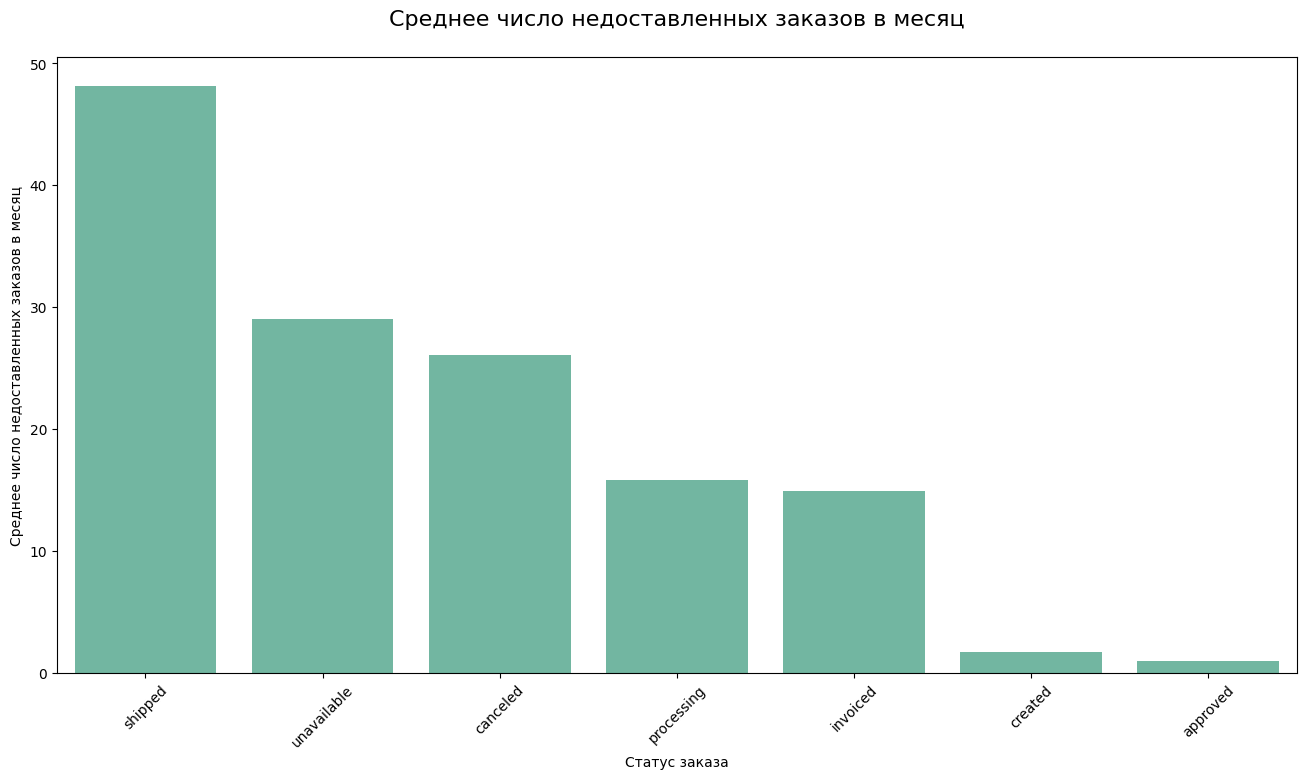

In [37]:
# Визуализируем результат
plt.figure(figsize=(16, 8))
sns.barplot(data=non_delivery_data_grouped, x='order_status', y='avg_per_month')
plt.title('Среднее число недоставленных заказов в месяц\n', fontsize=16)
plt.xlabel('Статус заказа')
plt.ylabel('Среднее число недоставленных заказов в месяц')
plt.xticks(rotation=45)
plt.show()

Но этот результат нельзя назвать окончательным, так как статус заказа не отражает причину недоставки товара. Причинами можно считать:

* Отмену заказа;
* Отсутствие товара на складе;
* Заказ в процессе сборки либо доставки(shipped, processing, approved) - эти заказы уже подтверждены и оплачены;
* Заказ в процессе обработки (invoiced, created) - дальнейшая судьба этих заказов нам неизвестна.

Посмотрим на данные в этом разрезе

In [38]:
# Создадим столбец и закодируем данные в новой градации
def new_encoding(data):
    data['new_status'] = ''
    
    data.loc[data.order_status == 'canceled', 'new_status'] = 'canceled'
    data.loc[data.order_status == 'unavailable', 'new_status'] = 'unavailable'
    data.loc[data.order_status.isin(['shipped', 'processing', 'approved']), 'new_status'] = 'processing'
    data.loc[data.order_status.isin(['invoiced', 'created']), 'new_status'] = 'not_approved'

    return data


new_encoding(non_delivery_data).head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year,month,new_status
46,f34a6e874087ec1f0e3dab9fdf659c5d,233896de79986082f1f479f1f85281cb,38300,ituiutaba,MG,6e98de3a85c84ead6689189b825d35b5,canceled,2018-03-15 10:07:02,2018-03-15 10:29:33,NaT,NaT,2018-04-09 00:00:00,2018,3,canceled
47,c132855c926907970dcf6f2bf0b33a24,a8ae36a2bb6c2bbc3b5d62ede131c9ef,18740,taquarituba,SP,b5172d4a722c0ebb34c29bbbb7a3cb42,invoiced,2018-04-17 13:14:13,2018-04-18 05:31:51,NaT,NaT,2018-05-24 00:00:00,2018,4,not_approved
70,4c7241af24b5344cb01fe687643de4fe,b157c176c3fe04914fde33f2dc8b878a,60336,fortaleza,CE,ad380680e87dea0f2abf5cd5bace626c,shipped,2018-01-21 15:54:02,2018-01-22 13:52:41,2018-01-24 18:26:40,NaT,2018-02-20 00:00:00,2018,1,processing
79,f6529ffebe6b3440d45d89604a4239ac,e5dbefdfdf3eff75c8e6cd655f128279,26272,nova iguacu,RJ,cc07a8fdd3a8e94d683c8142a117dbc1,shipped,2018-01-11 17:11:11,2018-01-12 17:49:45,2018-01-17 16:56:32,NaT,2018-02-09 00:00:00,2018,1,processing
100,ae76a4650235ab18764708174f1da31e,2b6082a140c439e2df870c85b0aa5e88,2983,sao paulo,SP,4c33ec562d9dc5655e160913aa86eb53,shipped,2017-08-11 23:47:48,2017-08-12 00:03:51,2017-08-14 13:24:58,NaT,2017-09-11 00:00:00,2017,8,processing


In [39]:
# Проведем группировку с новыми статусами заказов
non_delivery_data_grouped = non_delivery_data.groupby(['year', 'month', 'new_status'], as_index=False)['order_id'].count() \
    .groupby('new_status', as_index=False)['order_id'] \
    .mean() \
    .round(2) \
    .sort_values('order_id', ascending=False) \
    .rename(columns={'order_id': 'avg_per_month'})
    
non_delivery_data_grouped

,new_status,avg_per_month
2,processing,61.30
3,unavailable,29.00
0,canceled,26.04
1,not_approved,15.19


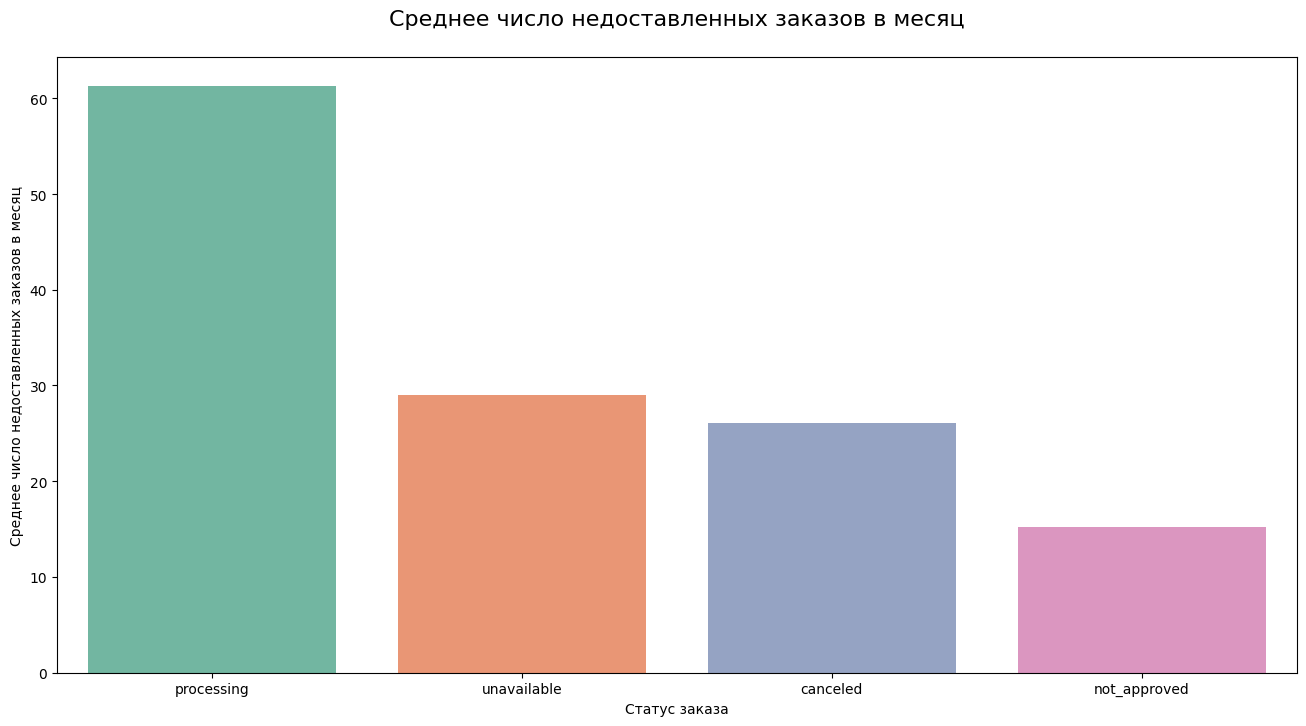

In [40]:
# Визуализируем результат
plt.figure(figsize=(16, 8))
sns.barplot(data=non_delivery_data_grouped, x='new_status', y='avg_per_month', hue='new_status')
plt.title('Среднее число недоставленных заказов в месяц\n', fontsize=16)
plt.xlabel('Статус заказа')
plt.ylabel('Среднее число недоставленных заказов в месяц')
plt.show()

**Вывод**: большинство недоставленных заказов (в среднем за месяц) подтверждены, оплачены и находятся в той или иной стадии доставки до покупателя - 61.3 заказа/мес. Следующий по зачимости статус - недоставка заказа по причине отсутствия товара - 29 заказов/мес. Примерно столько же заказов отменены - 26.04 заказа/мес и 15.19 заказов/мес имеют статус, не предполагающий доставку на этой стадии.

#### 3.3. По каждому товару определить, в какой день недели товар чаще всего покупается.

In [41]:
# Объединим таблицы для доступа к данным по товарам
# Оставляем только заказы с покупками
full_data = items_data.merge(merge_customer \
            .query('order_status in ["delivered", "shipped", "processing"]'), how='left', on='order_id')
full_data.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,28013.0,campos dos goytacazes,RJ,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,15775.0,santa fe do sul,SP,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474,35661.0,para de minas,MG,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,af861d436cfc08b2c2ddefd0ba074622,12952.0,atibaia,SP,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,64b576fb70d441e8f1b2d7d446e483c5,13226.0,varzea paulista,SP,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00


In [42]:
# Создадим столбец с днем недели создания заказа
full_data['day_of_week'] = full_data['order_purchase_timestamp'].dt.day_name()
full_data['day_of_week'].value_counts()

day_of_week
Monday       18227
Tuesday      18070
Wednesday    17477
Thursday     16639
Friday       15936
Sunday       13318
Saturday     12072
Name: count, dtype: int64

In [43]:
# Считаем количество заказов по дням недели для каждого товара
grouped_by_week = full_data.groupby('product_id', as_index=False)['day_of_week'] \
    .value_counts().rename(columns={'count': 'count_orders'})
grouped_by_week.tail()

,product_id,day_of_week,count_orders
60672,fffdb2d0ec8d6a61f0a0a0db3f25b441,Tuesday,2
60673,fffdb2d0ec8d6a61f0a0a0db3f25b441,Friday,1
60674,fffdb2d0ec8d6a61f0a0a0db3f25b441,Sunday,1
60675,fffdb2d0ec8d6a61f0a0a0db3f25b441,Thursday,1
60676,fffe9eeff12fcbd74a2f2b007dde0c58,Wednesday,1


In [44]:
# Для каждого товара получим индекс максимального значения count_orders
max_indices = grouped_by_week.groupby(['product_id'])['count_orders'].idxmax()
# Отфильтруем строки по полученным индексам
max_count_order_by_day = grouped_by_week.loc[max_indices]
max_count_order_by_day.tail()

,product_id,day_of_week,count_orders
60668,fff6177642830a9a94a0f2cba5e476d1,Saturday,1
60670,fff81cc3158d2725c0655ab9ba0f712c,Monday,1
60671,fff9553ac224cec9d15d49f5a263411f,Friday,1
60672,fffdb2d0ec8d6a61f0a0a0db3f25b441,Tuesday,2
60676,fffe9eeff12fcbd74a2f2b007dde0c58,Wednesday,1


#### 3.4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)?

In [45]:
# Создадим столбцы с месяцем и годом создания заказа для последующей группировки
full_data['year'] = full_data['order_purchase_timestamp'].dt.isocalendar()['year']
full_data['month'] = full_data['order_purchase_timestamp'].dt.month
full_data['week'] = full_data['order_purchase_timestamp'].dt.isocalendar()['week']

In [46]:
date_gruped = full_data.groupby(['year', 'month'], as_index=False)['order_purchase_timestamp'].agg(['min', 'max'])
date_gruped.head()

,year,month,min,max
0,2016,9.0,2016-09-04 21:15:19,2016-09-15 12:16:38
1,2016,10.0,2016-10-03 09:44:50,2016-10-10 18:09:39
2,2016,12.0,2016-12-23 23:16:47,2016-12-23 23:16:47
3,2017,1.0,2017-01-05 11:56:06,2017-01-31 23:37:58
4,2017,2.0,2017-02-01 08:42:43,2017-02-28 23:47:08


In [47]:
# Посчитаем количество недель для каждого месяца
date_gruped['count_week'] = ((date_gruped['max'] - date_gruped['min']).dt.days + 1)/7
date_gruped.head()

,year,month,min,max,count_week
0,2016,9.0,2016-09-04 21:15:19,2016-09-15 12:16:38,1.571429
1,2016,10.0,2016-10-03 09:44:50,2016-10-10 18:09:39,1.142857
2,2016,12.0,2016-12-23 23:16:47,2016-12-23 23:16:47,0.142857
3,2017,1.0,2017-01-05 11:56:06,2017-01-31 23:37:58,3.857143
4,2017,2.0,2017-02-01 08:42:43,2017-02-28 23:47:08,4.000000


In [48]:
# Посчитаем количество заказов в месяц для каждого покупателя
customer_grouped = full_data \
    .groupby(['year', 'month', 'customer_unique_id'], as_index=False)['order_id'] \
    .count() \
    .rename(columns={'order_id': 'order_per_month'})
customer_grouped.head()

,year,month,customer_unique_id,order_per_month
0,2016,9.0,830d5b7aaa3b6f1e9ad63703bec97d23,3
1,2016,9.0,b7d76e111c89f7ebf14761390f0f7d17,2
2,2016,10.0,0032c76b20340da25249092a268ce66c,1
3,2016,10.0,01f156677184504063bd19739f924af1,1
4,2016,10.0,0313291a6f4f16df04dcf819d88c38ef,1


In [49]:
# Объединим 2 таблицы для получения количества недель в месяце
grouped_with_count_week = customer_grouped.merge(date_gruped, how='left', on=['year', 'month']).drop(columns=['min', 'max'])
grouped_with_count_week.head()

,year,month,customer_unique_id,order_per_month,count_week
0,2016,9.0,830d5b7aaa3b6f1e9ad63703bec97d23,3,1.571429
1,2016,9.0,b7d76e111c89f7ebf14761390f0f7d17,2,1.571429
2,2016,10.0,0032c76b20340da25249092a268ce66c,1,1.142857
3,2016,10.0,01f156677184504063bd19739f924af1,1,1.142857
4,2016,10.0,0313291a6f4f16df04dcf819d88c38ef,1,1.142857


In [50]:
# Посчитаем заказы в неделю
grouped_with_count_week['order_per_week'] = grouped_with_count_week['order_per_month'] / grouped_with_count_week['count_week']
grouped_with_count_week.head()

,year,month,customer_unique_id,order_per_month,count_week,order_per_week
0,2016,9.0,830d5b7aaa3b6f1e9ad63703bec97d23,3,1.571429,1.909091
1,2016,9.0,b7d76e111c89f7ebf14761390f0f7d17,2,1.571429,1.272727
2,2016,10.0,0032c76b20340da25249092a268ce66c,1,1.142857,0.875000
3,2016,10.0,01f156677184504063bd19739f924af1,1,1.142857,0.875000
4,2016,10.0,0313291a6f4f16df04dcf819d88c38ef,1,1.142857,0.875000


In [51]:
# Вычислим среднее количество заказов в неделю по месяцам для каждого пользователя
orders_per_week = grouped_with_count_week.groupby(['customer_unique_id', 'month'], as_index=False) \
    ['order_per_week'].mean().round(3)
orders_per_week.head()

,customer_unique_id,month,order_per_week
0,0000366f3b9a7992bf8c76cfdf3221e2,5.0,0.226
1,0000b849f77a49e4a4ce2b2a4ca5be3f,5.0,0.226
2,0000f46a3911fa3c0805444483337064,3.0,0.226
3,0000f6ccb0745a6a4b88665a16c9f078,10.0,0.226
4,0004aac84e0df4da2b147fca70cf8255,11.0,0.233


In [52]:
print(f'Минимальное среднее количество заказов на клиента: {orders_per_week.order_per_week.min()}')

Минимальное среднее количество заказов на клиента: 0.226


In [53]:
print(f'Максимальное среднее количество заказов на клиента: {orders_per_week.order_per_week.max()}')

Максимальное среднее количество заказов на клиента: 7.0


### 4. Когортный анализ пользователей

Выявить когорту с самым высоким retention на 3-й месяц в период с января по декабрь.

Будем производить расчет за 2017 год, так как это единственный полный год в данных. Берем данные, которые учитывают заказы, ставшие покупками, так как в первую очередь нас интересуют клиенты, вернувшиеся за повторными покупками.

In [54]:
# Определим месяц и год для каждого заказа
full_data['year_month'] = full_data.order_purchase_timestamp.dt.to_period("M")

In [55]:
# Определим месяц и год начала активности каждого клиента
full_data['start_month'] = full_data.groupby('customer_unique_id')['year_month'].transform('min')

In [56]:
# Отфильтруем данные по заказам в 2017 году и дате первой активности в 2017 году
cohort_data = full_data.query('year == 2017 & start_month >= "2017-01"')

In [57]:
# сгруппируем и посчитаем количество уникальных пользователей в когортах
cohort = cohort_data.groupby(['start_month', 'year_month']) \
    .customer_unique_id.apply(pd.Series.nunique) \
    .reset_index()
cohort.head()

,start_month,year_month,customer_unique_id
0,2017-01,2017-01,740
1,2017-01,2017-02,3
2,2017-01,2017-03,2
3,2017-01,2017-04,1
4,2017-01,2017-05,3


In [58]:
# создадим индексы для месяцев
cohort['cohort_idx'] = cohort.year_month.dt.month - cohort.start_month.dt.month + 1

In [59]:
# выводим в таблицу абсолютные значения количества пользователей
cohort_table = cohort.pivot(index='start_month', columns='cohort_idx', values='customer_unique_id')
cohort_table

cohort_idx,1,2,3,4,5,6,7,8,9,10,11,12
start_month,,,,,,,,,,,,
2017-01,740.0,3.0,2.0,1.0,3.0,1.0,3.0,1.0,1.0,NaN,3.0,1.0
2017-02,1678.0,4.0,5.0,2.0,7.0,2.0,4.0,3.0,2.0,3.0,2.0,NaN
2017-03,2568.0,13.0,9.0,10.0,9.0,4.0,4.0,8.0,9.0,2.0,NaN,NaN
2017-04,2310.0,14.0,5.0,4.0,7.0,6.0,8.0,7.0,7.0,NaN,NaN,NaN
2017-05,3525.0,17.0,17.0,14.0,11.0,12.0,15.0,5.0,NaN,NaN,NaN,NaN
2017-06,3094.0,14.0,11.0,12.0,8.0,11.0,11.0,NaN,NaN,NaN,NaN,NaN
2017-07,3815.0,20.0,13.0,9.0,11.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,4112.0,28.0,14.0,11.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,4060.0,28.0,22.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
# определяем размер каждой когорты (первый столбец таблицы)
cs = cohort_table.iloc[:,0]

In [61]:
# считаем Retention Rate
retention = cohort_table.divide(cs, axis=0)

In [62]:
# Удалим столбец первого месяца
retention = retention.reset_index().drop(columns=1).set_index('start_month')

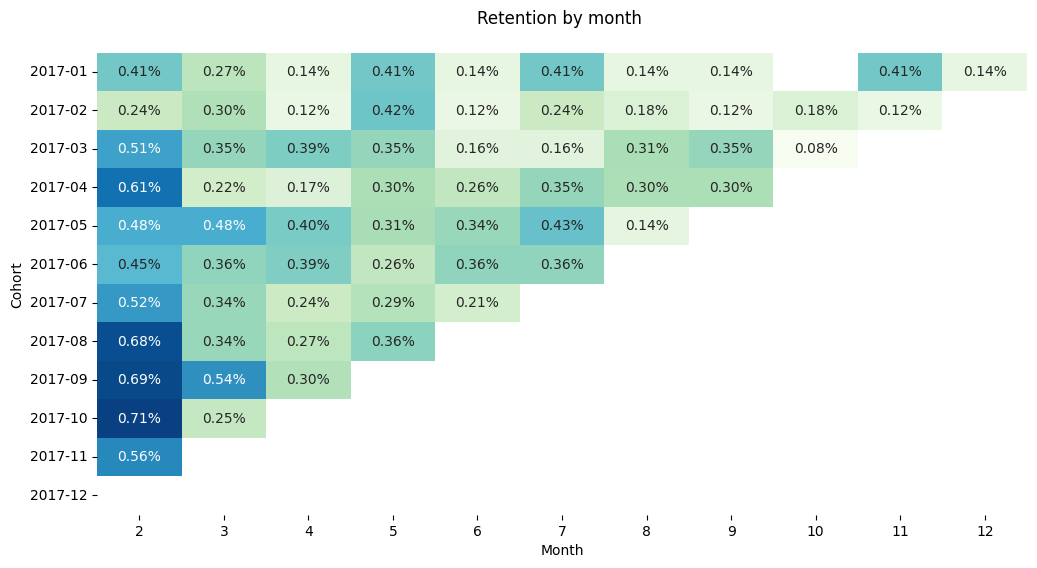

In [63]:
# Выводим результат
plt.figure(figsize=(12, 6))
sns.heatmap(retention, annot=True, fmt='.2%', cbar=False, cmap='GnBu')
plt.title('Retention by month \n')
plt.xlabel('Month')
plt.ylabel('Cohort')
plt.show()

Вывод: самый высокий Retention за 3-й месяц в когорте у пользователей, проявивших первую активность в сентябре 2017 года - 0.54%

### 5. RFM-сегментация пользователей

Для RFM-анализа возьмем весь временной период. За дату отсчета примем последнюю дату покупки + 1 день.

In [64]:
 # Расчитаем стоимость каждого заказа
orders = full_data.groupby(['order_id', 'order_purchase_timestamp', 'customer_unique_id'], as_index=False)['price'].sum()
orders.head()

,order_id,order_purchase_timestamp,customer_unique_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13 08:59:02,871766c5855e863f6eccc05f988b23cb,58.90
1,00018f77f2f0320c557190d7a144bdd3,2017-04-26 10:53:06,eb28e67c4c0b83846050ddfb8a35d051,239.90
2,000229ec398224ef6ca0657da4fc703e,2018-01-14 14:33:31,3818d81c6709e39d06b2738a8d3a2474,199.00
3,00024acbcdf0a6daa1e931b038114c75,2018-08-08 10:00:35,af861d436cfc08b2c2ddefd0ba074622,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,2017-02-04 13:57:51,64b576fb70d441e8f1b2d7d446e483c5,199.90


In [65]:
# дата отсчета
now = orders.order_purchase_timestamp.max() + timedelta(days=1)
now

Timestamp('2018-09-04 09:06:57')

In [66]:
# В новый столбец занесем количество дней, прошедших с каждого заказа
orders['days_from_order'] = (now - orders['order_purchase_timestamp']).dt.days
orders.head()

,order_id,order_purchase_timestamp,customer_unique_id,price,days_from_order
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13 08:59:02,871766c5855e863f6eccc05f988b23cb,58.90,356
1,00018f77f2f0320c557190d7a144bdd3,2017-04-26 10:53:06,eb28e67c4c0b83846050ddfb8a35d051,239.90,495
2,000229ec398224ef6ca0657da4fc703e,2018-01-14 14:33:31,3818d81c6709e39d06b2738a8d3a2474,199.00,232
3,00024acbcdf0a6daa1e931b038114c75,2018-08-08 10:00:35,af861d436cfc08b2c2ddefd0ba074622,12.99,26
4,00042b26cf59d7ce69dfabb4e55b4fd9,2017-02-04 13:57:51,64b576fb70d441e8f1b2d7d446e483c5,199.90,576


In [67]:
# Создаем таблицу со значениями Recency, Frequency и Monetary
rfm = orders.groupby('customer_unique_id', as_index=False).agg(
    {'days_from_order': 'min', # количество дней с последнего заказа (Recency)
    'order_purchase_timestamp': pd.Series.nunique, # общее число покупок за все время (Frequency)
    'price': 'sum' # общая сумма покупок клиента за все время(Monetary)
     }) \
    .rename(columns={'days_from_order': 'recency',
                    'order_purchase_timestamp': 'frequency',
                    'price': 'monetary'}) 
rfm.head()

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90
2,0000f46a3911fa3c0805444483337064,542,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00


Для определения рангов изучим подробнее получившившиеся значения Recency, Frequency и Monetary.

In [68]:
# Посмотрим на описательные статистики Recency
rfm.recency.describe()

count    94685.000000
mean       243.240756
std        152.828251
min          1.000000
25%        119.000000
50%        224.000000
75%        352.000000
max        729.000000
Name: recency, dtype: float64

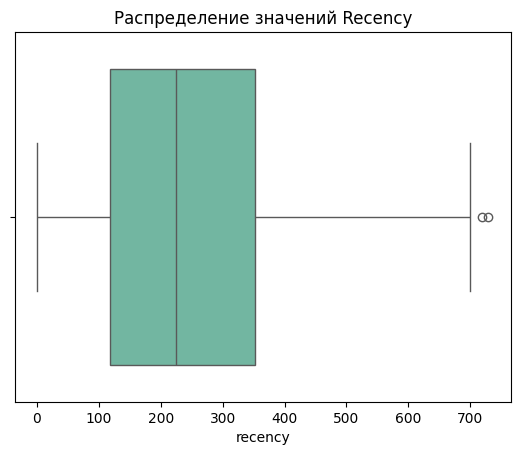

In [69]:
sns.boxplot(data=rfm, x='recency')
plt.title('Распределение значений Recency')
plt.show()

Для такого распределения давности заказов можно применить метод квантилей.

In [70]:
quantiles_recency = rfm['recency'].quantile([.25, .5, .75]).to_dict()
quantiles_recency

{0.25: 119.0, 0.5: 224.0, 0.75: 352.0}

* от 1 до 119 дней - 4 ранг
* от 120 до 224 дней - 3 ранг
* от 225 до 352 дней - 2 ранг
* от 353 дней до 729 дней - 1 ранг

In [71]:
# Создаем функцию для присвоения рангов Recency
def r_score(x):
    if x <= quantiles_recency[.25]:
        return 4
    elif x <= quantiles_recency[.5]:
        return 3
    elif x <= quantiles_recency[.75]:
        return 2
    else:
        return 1

In [72]:
# Посмотрим на распределение значений Frequency
rfm.frequency.value_counts()

frequency
1     92062
2      2416
3       161
4        29
5         8
6         4
7         3
9         1
16        1
Name: count, dtype: int64

Я думаю, здесь метод квантилей не подойдет. Буду разбивать врчную на 4 категории:

* 5 - 9 покупок - ранг 4
* 3 - 4 покупки - ранг 3
* 2 покупки - ранг 2
* 1 покупка - ранг 1

In [73]:
# Создаем функцию для присвоения рангов Frequency
def f_score(x):
    if 9 >= x >=5:
        return 4
    elif 4 >= x >=3:
        return 3
    elif x == 2:
        return 2
    else:
        return 1

In [74]:
# Посмотрим на описательные статистики Monetary
rfm.monetary.describe()

count    94685.000000
mean       141.866872
std        215.713612
min          0.850000
25%         47.800000
50%         89.800000
75%        154.910000
max      13440.000000
Name: monetary, dtype: float64

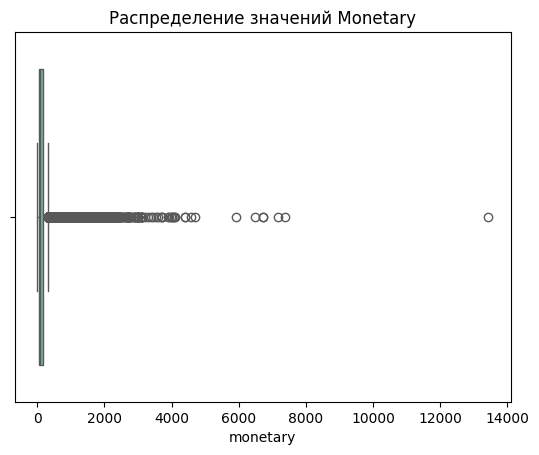

In [75]:
sns.boxplot(data=rfm, x='monetary')
plt.title('Распределение значений Monetary')
plt.show()

Думаю, что здесь также подойдет метод квантилей.

In [76]:
quantiles_monetary = rfm['monetary'].quantile([.25, .5, .75]).to_dict()
quantiles_monetary

{0.25: 47.8, 0.5: 89.8, 0.75: 154.91}

* 0.85 - 47.8 - ранг 1
* более 47.8 - 89.8 - ранг 2
* более 89.8 - 154.91 - ранг 3
* более 154.91 - 13440 - ранг 4

In [77]:
# Создаем функцию для присвоения рангов Monetary
def m_score(x):
    if x <= quantiles_monetary[.25]:
        return 1
    elif x <= quantiles_monetary[.5]:
        return 2
    elif x <= quantiles_monetary[.75]:
        return 3
    else:
        return 4

In [78]:
# Получаем оценки для каждого клиента
rfm['R'] = rfm['recency'].apply(lambda x: r_score(x))
rfm['M'] = rfm['monetary'].apply(lambda x: m_score(x))
rfm['F'] = rfm['frequency'].apply(lambda x: f_score(x))

In [79]:
# Объединяем RFM-оценки в один балл
rfm['RFM'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.head()

,customer_unique_id,recency,frequency,monetary,R,M,F,RFM
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90,4,3,1,413
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,4,1,1,411
2,0000f46a3911fa3c0805444483337064,542,1,69.00,1,2,1,112
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,2,4,1,214


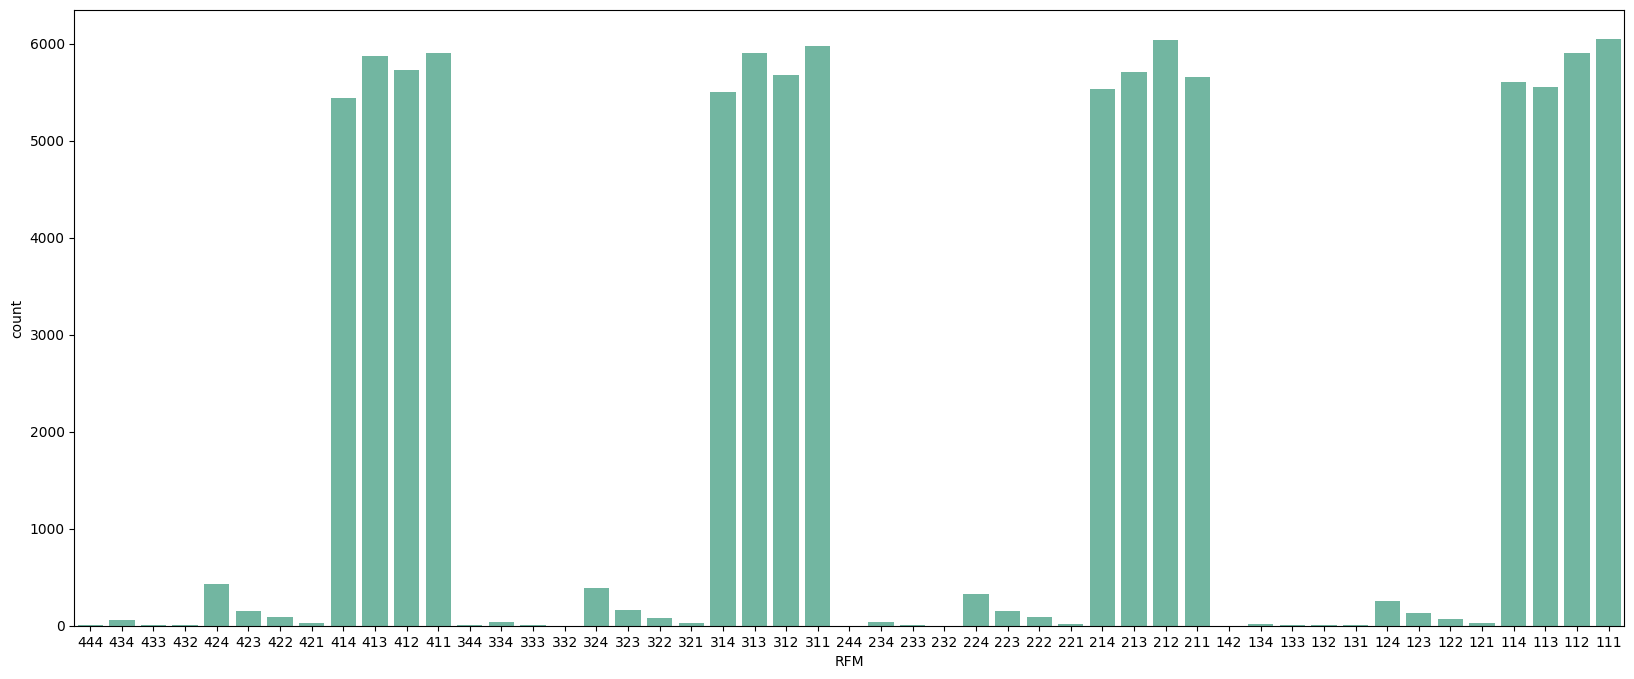

In [80]:
# Визуализируем баллы RFM, отсортировав по убыванию
plt.figure(figsize=(20, 8))
sns.countplot(data=rfm.sort_values('RFM', ascending=False), x='RFM')
plt.show()

Мы видим, что для всех сроков давности с последней покупки (Recency), частота (Frequency) распределилась примерно одинаково.



In [81]:
# Создадим словарь для определения сегментов
segment_map = {
    r'[1-2][1-2]':'Спящие',
    r'[1-2]2': 'Требуют внимания',
    r'[1-2][3-4]': 'Много покупали, но давно',
    r'[2-4]1': 'Недавние',
    r'[2-4]2': 'Потенциально лояльные',
    r'[2-4]3': 'Лояльные',
    r'[2-4]4': 'Чемпионы'
}
# Создаем столбец с получившимся сегментом
rfm['segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['segment'] = rfm['segment'].replace(segment_map, regex=True)
rfm.head()

,customer_unique_id,recency,frequency,monetary,R,M,F,RFM,segment
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90,4,3,1,413,Недавние
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,4,1,1,411,Недавние
2,0000f46a3911fa3c0805444483337064,542,1,69.00,1,2,1,112,Спящие
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,2,1,1,211,Спящие
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,2,4,1,214,Спящие


In [82]:
# Посмотрим на распределение клиентов по сегментам
rfm.segment.value_counts()

segment
Спящие                      47127
Недавние                    46007
Потенциально лояльные        1345
Лояльные                      118
Много покупали, но давно       74
Чемпионы                       14
Name: count, dtype: int64

In [83]:
# Рассчитаем Monetary для сегментов
segment_grouped = rfm.groupby('segment', as_index=False) \
    .monetary \
    .sum() \
    .round(2) \
    .sort_values('monetary', ascending=False)

segment_grouped

,segment,monetary
4,Спящие,6640417.80
2,Недавние,6369201.98
3,Потенциально лояльные,332698.03
0,Лояльные,51064.96
1,"Много покупали, но давно",29056.69
5,Чемпионы,10225.31


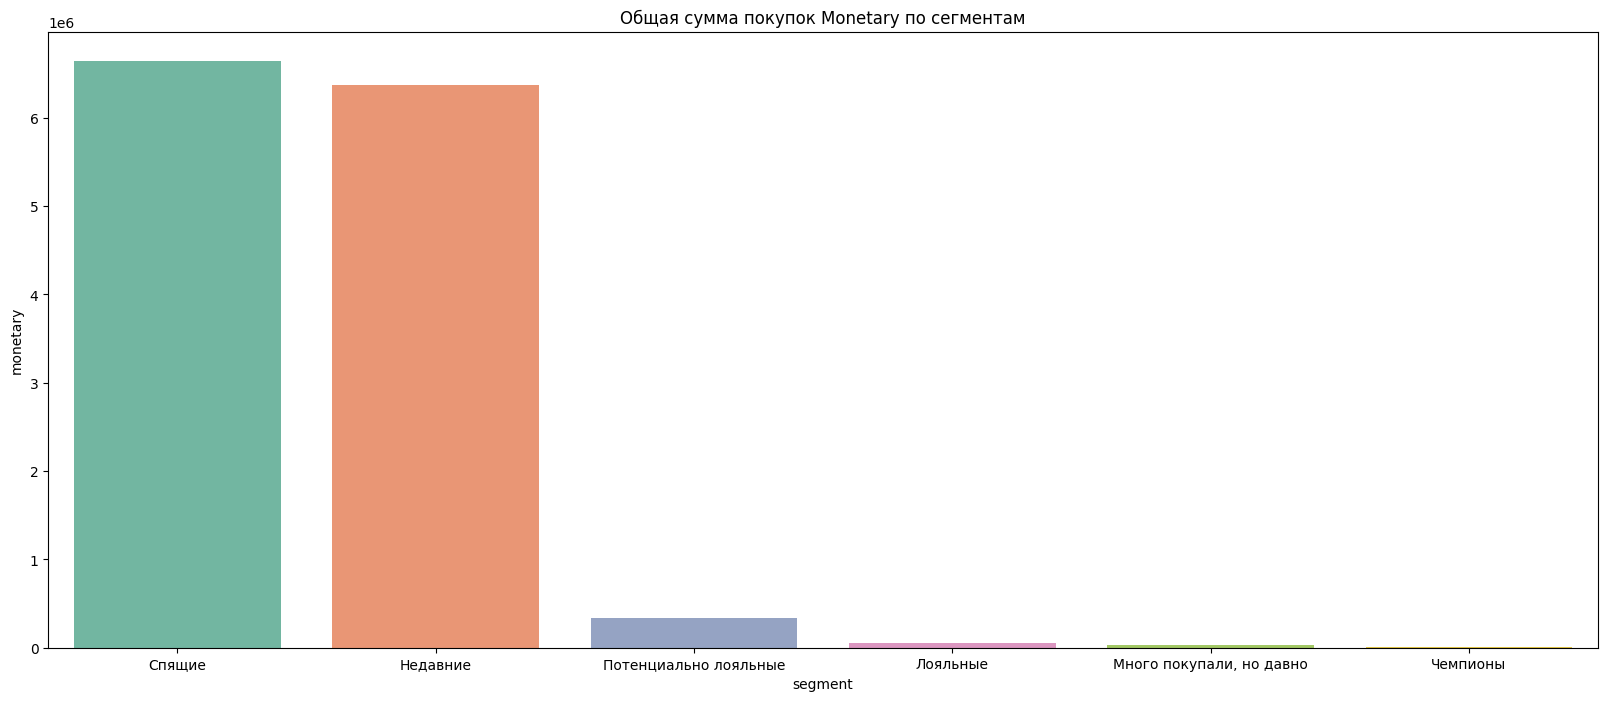

In [84]:
# Визуализируем результат
plt.figure(figsize=(20, 8))
sns.barplot(data=segment_grouped, x='segment', y='monetary', hue='segment')
plt.title('Общая сумма покупок Monetary по сегментам')
plt.show()

Как видно, несравненно большую прибыль приносят клиенты из сегментов "Спящие" и "Недавние", то есть те, кто совершил покупку один раз за весь период. Это не удивительно, так как их намного больше, чем остальных.

Посмотрим на размер Monetary на одного клиента в разрезе сегментов

In [85]:
# Группируем данные по сегментам и считаем количество клиентов
monetary_per_customer = rfm.groupby('segment', as_index=False) \
    .agg({'monetary': 'sum', 'customer_unique_id': 'count'}) \
    .round(2) \
    .sort_values('monetary', ascending=False) \
    .rename(columns={'customer_unique_id': 'customers'})

monetary_per_customer

,segment,monetary,customers
4,Спящие,6640417.80,47127
2,Недавние,6369201.98,46007
3,Потенциально лояльные,332698.03,1345
0,Лояльные,51064.96,118
1,"Много покупали, но давно",29056.69,74
5,Чемпионы,10225.31,14


In [86]:
# Вычисляем Monetary на одного клиента
monetary_per_customer['monetary_per_cust'] = \
    round(monetary_per_customer.monetary / monetary_per_customer.customers, 2) 
    
monetary_per_customer.sort_values('monetary_per_cust', ascending=False, inplace=True)

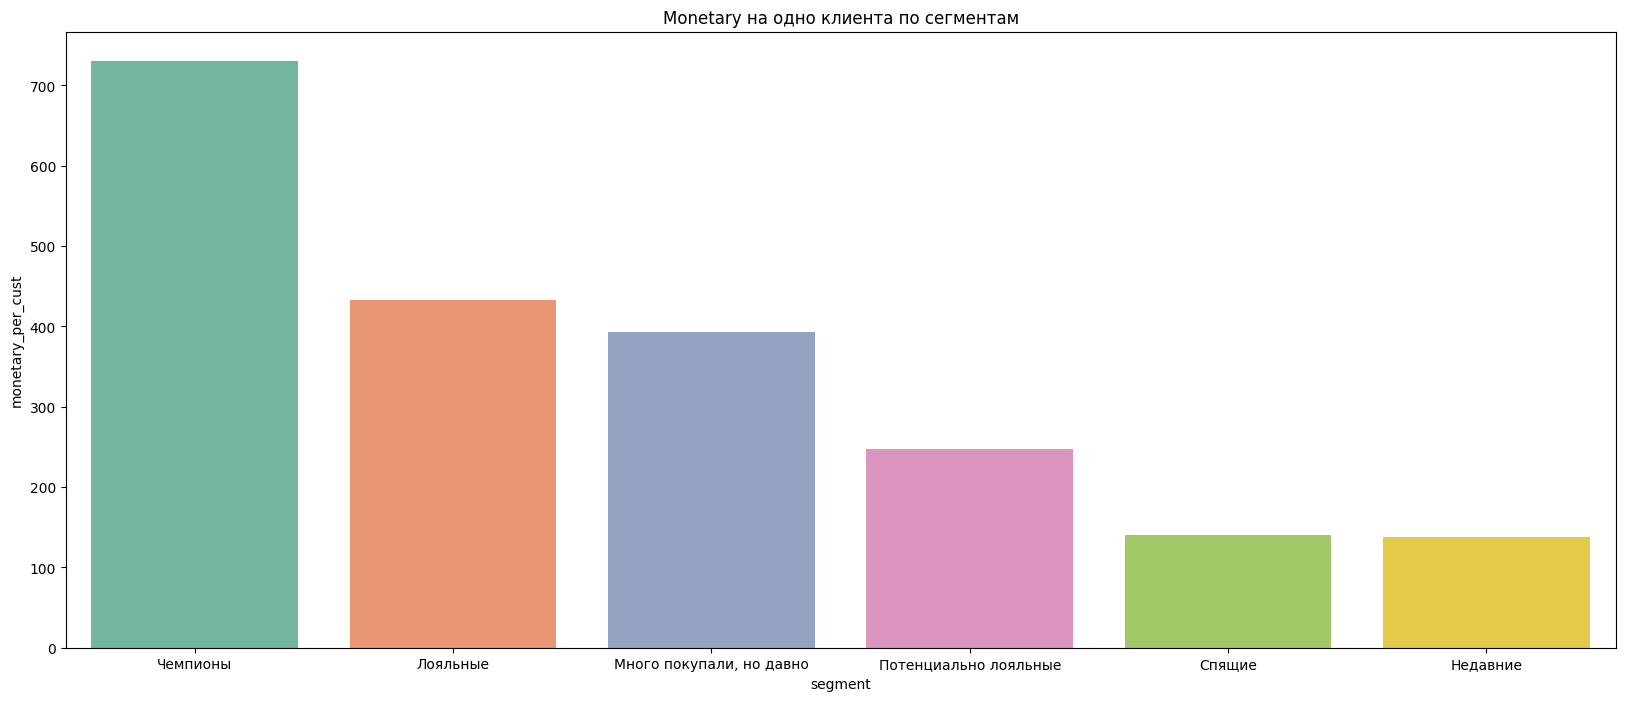

In [87]:
# Визуализируем результат
plt.figure(figsize=(20, 8))
sns.barplot(data=monetary_per_customer, x='segment', y='monetary_per_cust', hue='segment')
plt.title('Monetary на одно клиента по сегментам')
plt.show()

У чемпионов показатель Monetary на одного клиента в 3 раза выше, чем у спящих и недавних, а трех остальных сегментов - в 2 раза выше. Следовательно, есть большой потенциал для бизнеса в нахождении способов перевода клиентов из "одноразовых" в категории с большим количеством покупок. Учитывая огромную разницу в количестве клиентов по сегментам, это должно быть что-то очень масштабное.